# Energy Efficiency Dataset – EDA and Cleaning (Fill-NaN Version)

## 1. Introduction
This notebook continues the data preparation process for the **Energy Efficiency Dataset (UCI)**,  
focusing on the version where missing values were **filled** instead of dropped.  

In the previous notebook, two strategies were defined to handle missing values:
1. **Drop-NaN version:** rows with missing data were removed.
2. **Fill-NaN version:** missing values were filled with column medians.

This notebook explores and cleans the **Fill-NaN version**, aiming to:
- Detect and remove outliers.
- Clean inconsistent categorical variables (`X6`, `X8`).
- Perform exploratory visualizations to confirm data consistency.
- Prepare the dataset for preprocessing and modeling.

---

## 2. Dataset Overview
The starting dataset (`data/interim/energy_efficiency_interim_fill.csv`) was loaded and inspected.

---

## 3. Outlier Detection and Removal (IQR Method)
Outliers were detected using the **Interquartile Range (IQR)** method applied to continuous numeric columns:  
`X1`, `X2`, `X3`, `X4`, `X5`, `X7`, `Y1`, and `Y2`.


### Validation
Boxplots before and after filtering confirmed that:
- Extreme geometric and load values were removed.
- Remaining distributions show balanced ranges with no excessive skewness.

---

## 4. Categorical Cleaning (`X6`, `X8`)
Both categorical features (`X6` = Orientation, `X8` = Glazing Area Distribution) contained **invalid codes** introduced by noise.

---

## 5. Exploratory Data Analysis
A comprehensive EDA was performed on the cleaned dataset.

---

## 6. Correlation Analysis
A **Pearson correlation heatmap** was computed for continuous variables (`X1–X5`, `X7`, `Y1`, `Y2`).

---

## 7. Data Saving and Versioning
After cleaning, the final filled dataset was saved under:
`data/processed/energy_efficiency_clean_fill`.csv and .parquet formats.


### Imports for the code
This section imports the necessary libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Inspect the Dataset
The dataset is loaded from a CSV file, and initial inspections are performed to understand its structure and content.
Checking skewness and kurtosis helps identify potential outliers.
Showing min and max values for each column provides insights into the data range.

In [2]:
# * Load dataset
df = pd.read_csv("../data/interim/energy_efficiency_interim_clean_fill.csv")

# Convert categorical columns to category type
df['X6'] = df['X6'].astype('category')
df['X8'] = df['X8'].astype('category')

# Basic info
print(df.shape)
df.info()
df.head()

(783, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      783 non-null    float64 
 1   X2      783 non-null    float64 
 2   X3      783 non-null    float64 
 3   X4      783 non-null    float64 
 4   X5      783 non-null    float64 
 5   X6      783 non-null    category
 6   X7      783 non-null    float64 
 7   X8      783 non-null    category
 8   Y1      783 non-null    float64 
 9   Y2      783 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 51.6 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [3]:
# * Descriptive statistics with skewness and kurtosis
desc = df.describe(include='all').T
desc['skewness'] = df.skew(numeric_only=True)
desc['kurtosis'] = df.kurtosis(numeric_only=True)
desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,skewness,kurtosis
X1,783.0,NaN,NaN,NaN,2.527165,34.720753,0.62,0.69,0.76,0.840,902.62,23.713208,593.107122
X2,783.0,NaN,NaN,NaN,776.483397,1868.708920,514.50,612.50,686.00,759.500,46893.00,21.405436,496.966053
X3,783.0,NaN,NaN,NaN,371.619413,939.963110,245.00,294.00,318.50,343.000,24622.50,23.100694,576.370717
X4,783.0,NaN,NaN,NaN,228.302363,714.411740,110.25,147.00,220.50,220.500,15214.50,16.535600,300.266150
X5,783.0,NaN,NaN,NaN,12.143040,66.465474,3.50,3.50,7.00,7.000,955.50,10.716663,121.284953
X6,783.0,14.0,5.0,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X7,783.0,NaN,NaN,NaN,2.104662,27.010051,0.00,0.10,0.25,0.400,516.00,15.918581,265.382847
X8,783.0,10.0,1.0,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y1,783.0,NaN,NaN,NaN,27.976649,75.620273,6.01,13.02,19.27,32.105,1676.70,16.594590,320.300624
Y2,783.0,NaN,NaN,NaN,38.871903,171.603947,10.90,15.77,23.11,33.370,3665.13,16.288596,302.407029


In [4]:
# * Show min and max for every column
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"{col:>3} → min: {col_min:>10} | max: {col_max:>10}")

 X1 → min:       0.62 | max:     902.62
 X2 → min:      514.5 | max:    46893.0
 X3 → min:      245.0 | max:    24622.5
 X4 → min:     110.25 | max:    15214.5
 X5 → min:        3.5 | max:      955.5
 X7 → min:        0.0 | max:      516.0
 Y1 → min:       6.01 | max: 1676.6999999999998
 Y2 → min:       10.9 | max:    3665.13


### Visualizations Before Cleaning
Histograms and boxplots are created for continuous variables to visualize their distributions and identify potential outliers.
Count plots for categorical variables (`X6`, `X8`) help identify invalid categories.

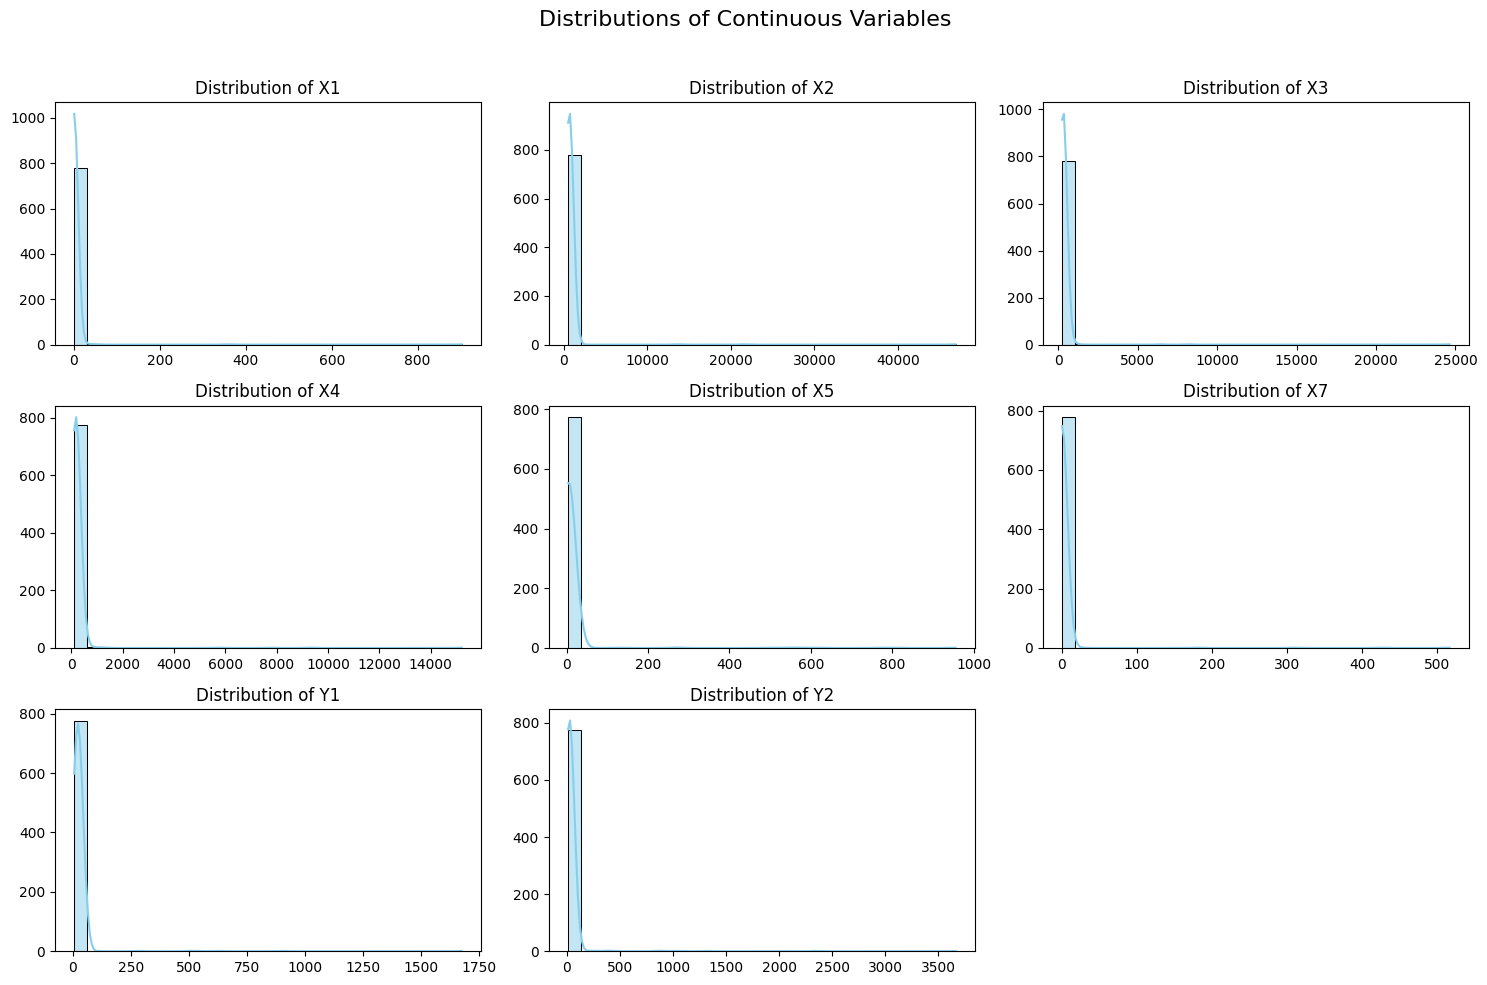

In [5]:
# * Histograms Continuous Variables
continuous_cols = ['X1','X2','X3','X4','X5','X7','Y1','Y2']

# 3 columns per row
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols  # automatic row count

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten grid for easy iteration

for i, col in enumerate(continuous_cols):
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distributions of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

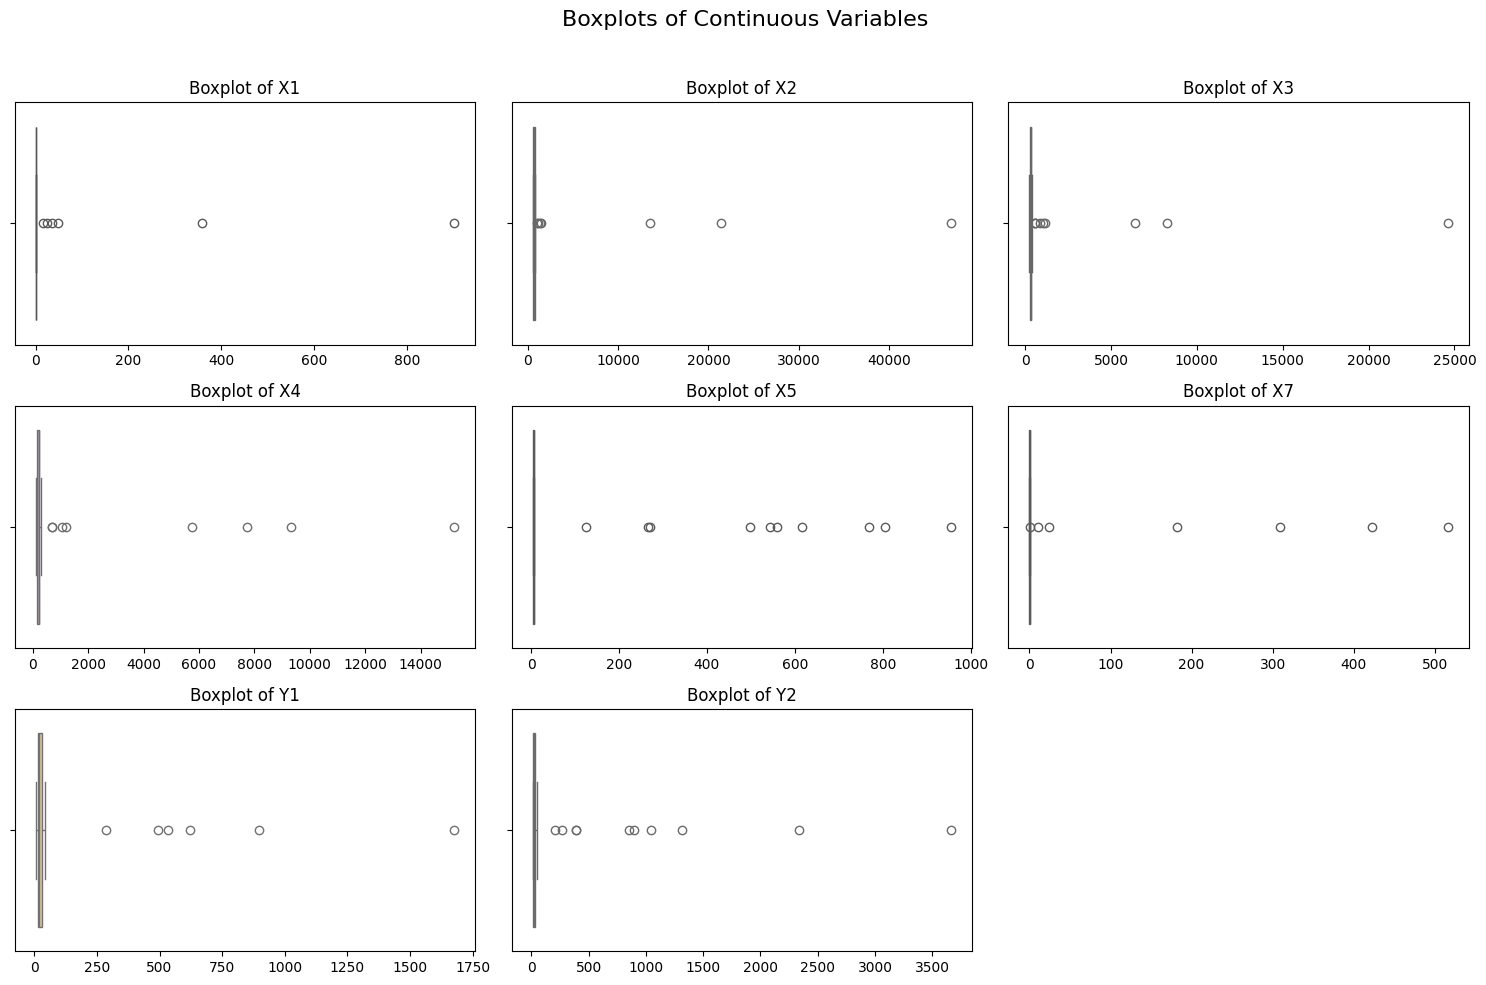

In [6]:
# * Boxplots Continuous Variables
palette = sns.color_palette('Set2', len(continuous_cols))
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df, x=col, color=palette[i], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

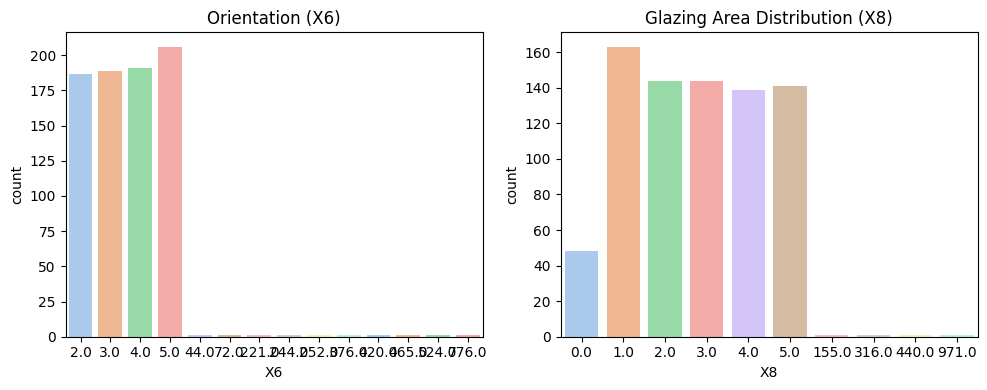

In [7]:
# * Countplots Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x='X6', hue='X6', data=df, palette='pastel', legend=False, ax=axes[0])
sns.countplot(x='X8', hue='X8', data=df, palette='pastel', legend=False, ax=axes[1])

axes[0].set_title('Orientation (X6)')
axes[1].set_title('Glazing Area Distribution (X8)')
plt.tight_layout()
plt.show()

### Outlier Removal Using IQR Method
The IQR method is applied to continuous numeric columns to identify and remove outliers.
The number of outliers removed per column is reported.

In [8]:
# * IQR Method to Remove Outliers
df_iqr = df.copy()

num_cols = ['X1','X2','X3','X4','X5','X7','Y1','Y2']

rows_before = df_iqr.shape[0]
outlier_counts = {}

for col in num_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 7 * IQR
    upper = Q3 + 7 * IQR

    # Count outliers for report
    n_outliers = ((df_iqr[col] < lower) | (df_iqr[col] > upper)).sum()
    outlier_counts[col] = n_outliers

    # Filter
    df_iqr = df_iqr[(df_iqr[col] >= lower) & (df_iqr[col] <= upper)]

rows_after = df_iqr.shape[0]

print(f"Before filtering: {rows_before}")
print(f"After filtering : {rows_after}\n")
print("Outliers removed per column:")
for col, n in outlier_counts.items():
    print(f"{col}: {n}")

Before filtering: 783
After filtering : 731

Outliers removed per column:
X1: 6
X2: 3
X3: 6
X4: 6
X5: 10
X7: 6
Y1: 6
Y2: 9


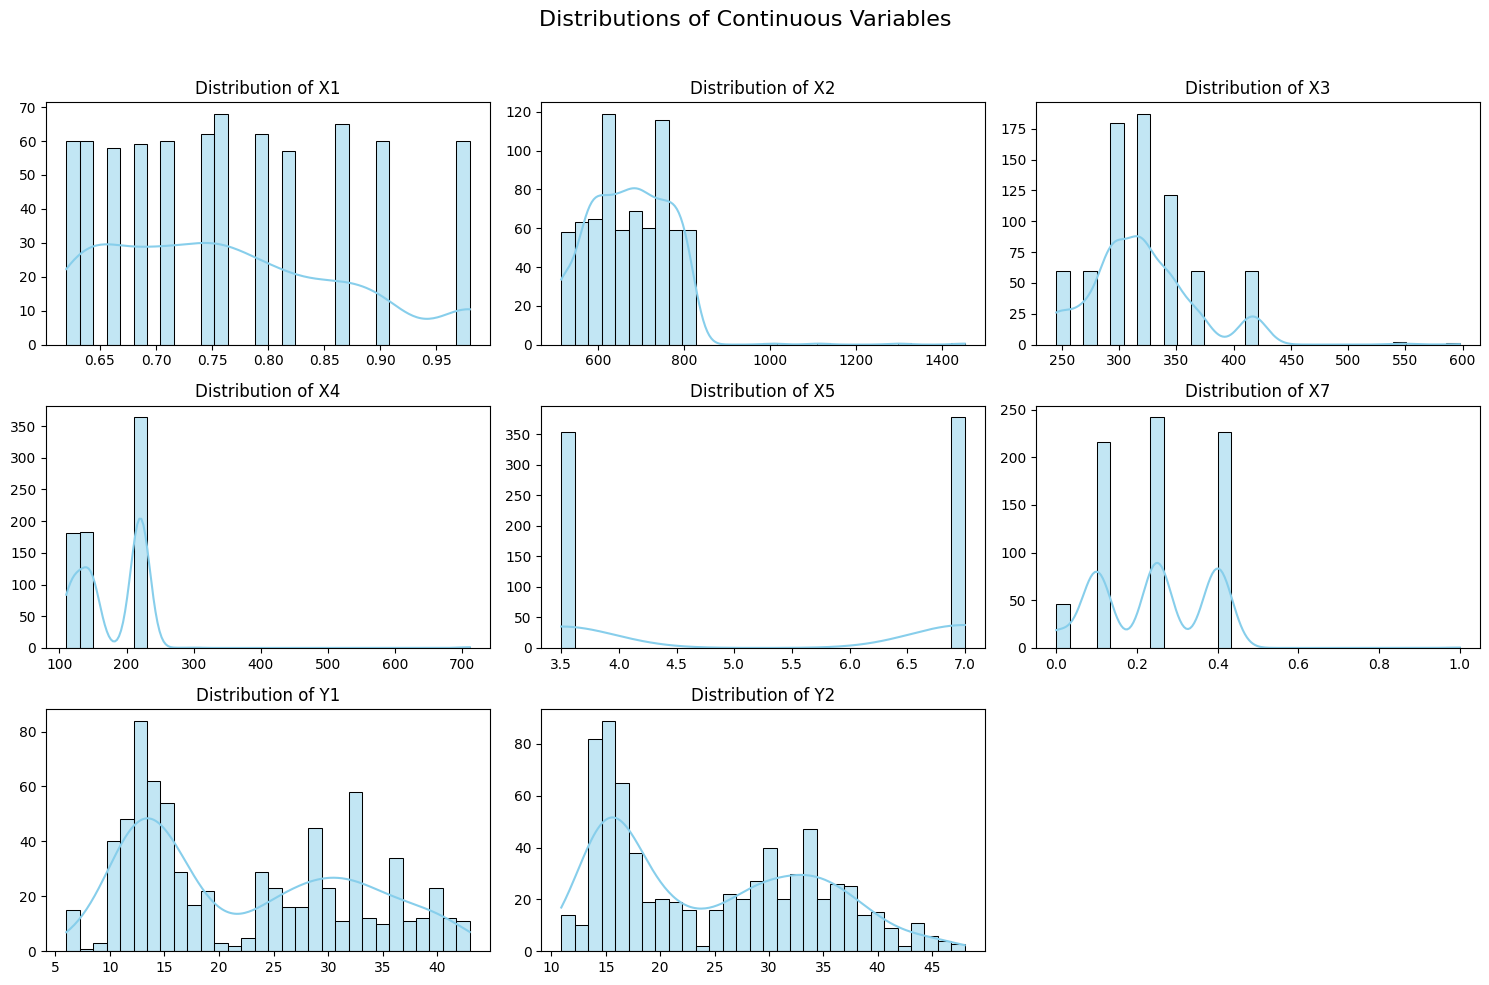

In [9]:
# * Histograms After IQR Filtering
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols  # automatic row count

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten grid for easy iteration

for i, col in enumerate(continuous_cols):
    sns.histplot(data=df_iqr, x=col, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distributions of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

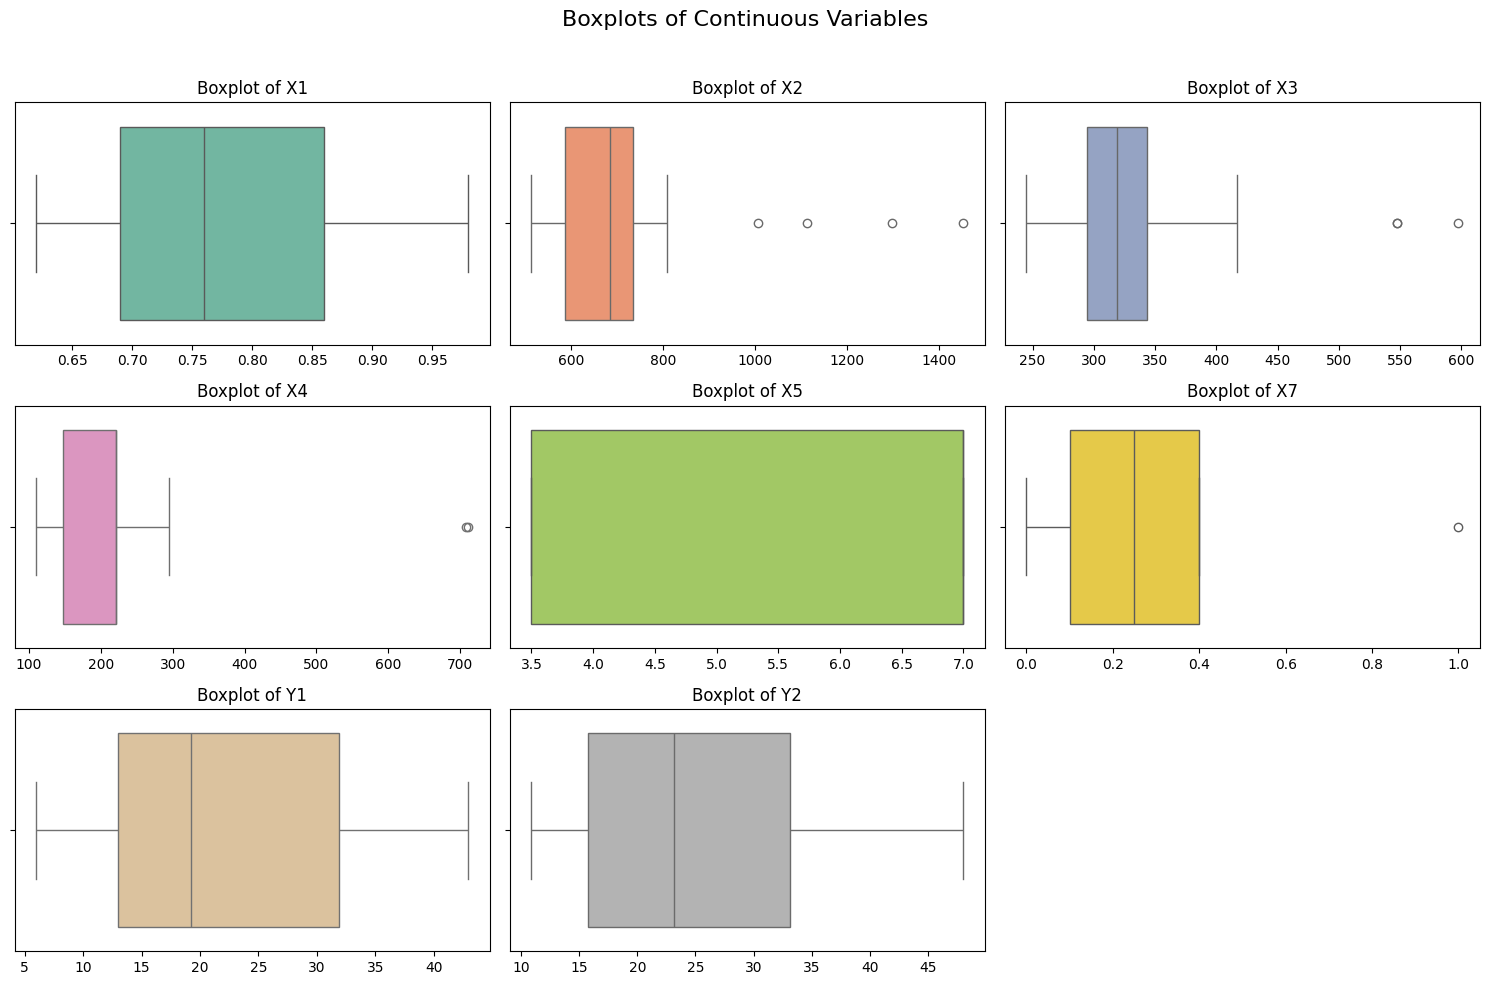

In [10]:
# * Boxplots After IQR Filtering
palette = sns.color_palette('Set2', len(continuous_cols))
n_cols = 3
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(data=df_iqr, x=col, color=palette[i], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots of Continuous Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
# * Clean Categorical Variables - Replace rare categories with mode
df_cat_clean = df_iqr.copy()

print("Original shape:", df_cat_clean.shape)
print()

# Define threshold for rare categories
threshold = 0.01

# X6: Identify rare categories and replace with mode
x6_freq = df_cat_clean['X6'].value_counts(normalize=True)
valid_x6 = x6_freq[x6_freq >= threshold].index.tolist()
rare_x6 = sorted(set(df_cat_clean['X6'].dropna().unique()) - set(valid_x6))

print(f"X6 - Valid categories (>={threshold*100}%): {sorted(valid_x6)}")
print(f"X6 - Rare categories to replace: {rare_x6}")

if rare_x6:
    # Get mode (most frequent category)
    x6_mode = df_cat_clean['X6'].mode()[0]
    rows_affected_x6 = df_cat_clean['X6'].isin(rare_x6).sum()
    print(f"X6 - Replacing {rows_affected_x6} rare values with mode: {x6_mode}")
    df_cat_clean.loc[df_cat_clean['X6'].isin(rare_x6), 'X6'] = x6_mode
else:
    print("X6 - No rare categories found")

print()

# X8: Identify rare categories and replace with mode
x8_freq = df_cat_clean['X8'].value_counts(normalize=True)
valid_x8 = x8_freq[x8_freq >= threshold].index.tolist()
rare_x8 = sorted(set(df_cat_clean['X8'].dropna().unique()) - set(valid_x8))

print(f"X8 - Valid categories (>={threshold*100}%): {sorted(valid_x8)}")
print(f"X8 - Rare categories to replace: {rare_x8}")

if rare_x8:
    # Get mode (most frequent category)
    x8_mode = df_cat_clean['X8'].mode()[0]
    rows_affected_x8 = df_cat_clean['X8'].isin(rare_x8).sum()
    print(f"X8 - Replacing {rows_affected_x8} rare values with mode: {x8_mode}")
    df_cat_clean.loc[df_cat_clean['X8'].isin(rare_x8), 'X8'] = x8_mode
else:
    print("X8 - No rare categories found")

print()

# Remove unused categories from the category catalog (after replacement)
df_cat_clean['X6'] = df_cat_clean['X6'].cat.remove_unused_categories()
df_cat_clean['X8'] = df_cat_clean['X8'].cat.remove_unused_categories()

print(f"✅ Shape after cleaning categorical outliers: {df_cat_clean.shape}")
print(f"   Unique X6: {sorted(df_cat_clean['X6'].unique())}")
print(f"   Unique X8: {sorted(df_cat_clean['X8'].unique())}")
print(f"   Rows retained: 100% (no rows removed, only values replaced)")

Original shape: (731, 10)

X6 - Valid categories (>=1.0%): [2.0, 3.0, 4.0, 5.0]
X6 - Rare categories to replace: [44.0, 72.0, 221.0, 244.0, 252.0, 376.0, 420.0, 465.0, 524.0, 776.0]
X6 - Replacing 10 rare values with mode: 5.0

X8 - Valid categories (>=1.0%): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
X8 - Rare categories to replace: [155.0, 316.0, 440.0, 971.0]
X8 - Replacing 4 rare values with mode: 1.0

✅ Shape after cleaning categorical outliers: (731, 10)
   Unique X6: [2.0, 3.0, 4.0, 5.0]
   Unique X8: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
   Rows retained: 100% (no rows removed, only values replaced)


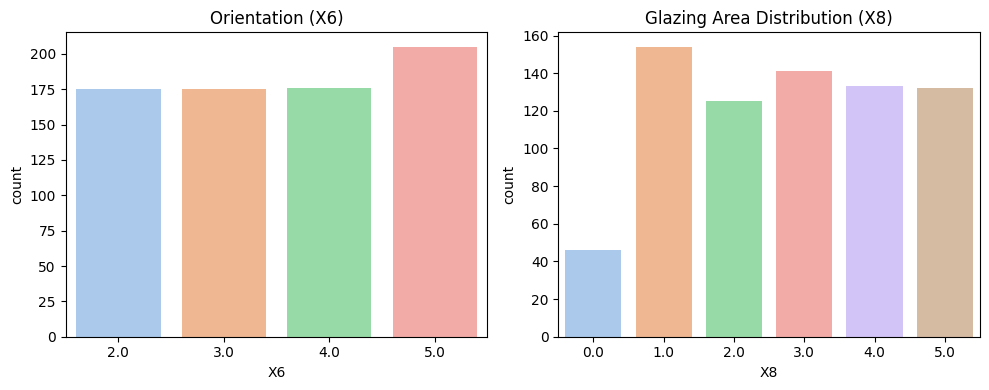

In [12]:
# * Countplots After Cleaning Categorical Variables
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x='X6', hue='X6', data=df_cat_clean, palette='pastel', legend=False, ax=axes[0])
sns.countplot(x='X8', hue='X8', data=df_cat_clean, palette='pastel', legend=False, ax=axes[1])

axes[0].set_title('Orientation (X6)')
axes[1].set_title('Glazing Area Distribution (X8)')
plt.tight_layout()
plt.show()

### Correlation Heatmap
A Pearson correlation heatmap is generated for continuous variables to visualize relationships and confirm data consistency.

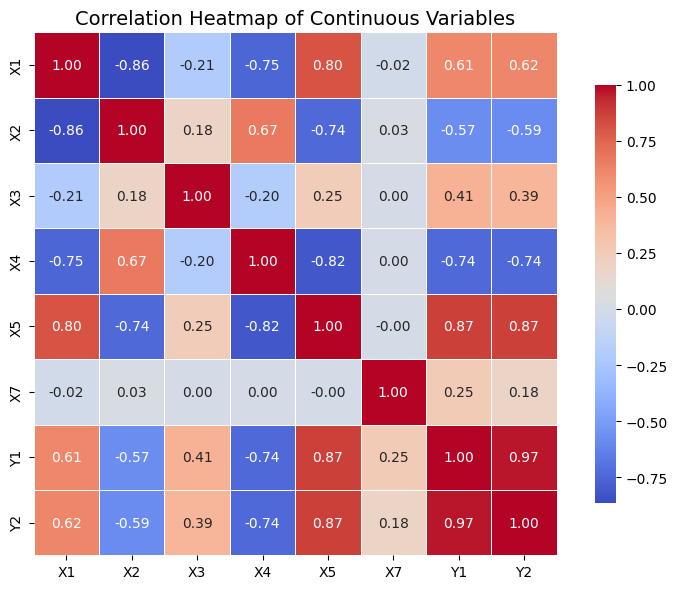

In [13]:
# * Correlation Heatmap
numeric_cols = ['X1','X2','X3','X4','X5','X7','Y1','Y2']

corr = df_cat_clean[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap of Continuous Variables", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
# * Code to save the dataset version
df_cat_clean.to_csv("../data/processed/energy_efficiency_clean_fill.csv", index=False)
# ? Save a parquet version
df_cat_clean.to_parquet("../data/processed/energy_efficiency_clean_fill.parquet", index=False, engine="fastparquet")

print("All datasets saved successfully.")

All datasets saved successfully.
